## Get traces and clean up

In [1]:
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import *
import pickle
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

import scipy.signal as sig
from scipy.cluster.vq import whiten

In [2]:
dat_fname = 'all_traces.pickle'

all_traces = pickle.load(open(dat_fname, 'rb'))

In [3]:
all_traces

[{'mcherry': tensor([142.7516, 164.6183, 149.4997,  91.7168,  41.4814,  40.8658,  96.4022,
           67.7660,  91.8070,  77.8250,  46.5551,  62.9885,  78.2622, 101.5921,
          122.3030, 103.4973, 130.1178, 120.8188,  89.9229,  83.4708,  73.6043,
           80.4294,  52.0556,  49.2272,  86.8102,  72.8415, 103.9323,  80.7531,
           42.6229,  86.2106,  69.9379,  67.9156, 102.4252,  76.1080,  82.4306,
          102.8093, 123.1456, 125.3962, 123.9912, 106.3090, 112.2922, 128.0672,
          100.2171, 103.5220, 105.8357,  83.1535,  92.5297, 137.4839, 182.2321,
          195.4037, 198.0653, 148.1302,  72.8344, 102.1213, 152.4975, 123.8264,
          133.6993, 137.8830, 138.5544, 167.2685, 106.3997, 113.6788,  27.0048,
           40.6185,  29.5413,  46.1672,  24.1550,  56.0454,  30.1852,  17.1063,
           10.5536,   8.8386,  47.7994,  79.2369,  26.1441,  48.4328,  54.3982,
           23.8820,  37.9856,  49.4447,  41.3228,  75.5900,  81.4220, 100.9922,
           86.5695,  76.3896,

## Remove noise via ICA

In [9]:
which_neuron = 0

In [15]:
def my_clean(dat):
    dat = whiten(dat)
    dat = sig.medfilt(dat, kernel_size=3)
    return dat

In [16]:
dat_mcherry = my_clean(all_traces[which_neuron]['mcherry'])
dat_gcamp = my_clean(all_traces[which_neuron]['gcamp'])

In [17]:
# Data shaping
X = np.vstack((dat_mcherry, dat_gcamp)).transpose()
transformer = FastICA(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)

# Get which one is the signal vs. noise
A = transformer.mixing_
# noise_ind = np.argmax(np.abs(A[0,:]))
signal_ind = np.argmax(np.abs(A[1,:]))
noise_ind = 1 if signal_ind==0 else 0

Text(0.5, 1.0, 'ICA other mode')

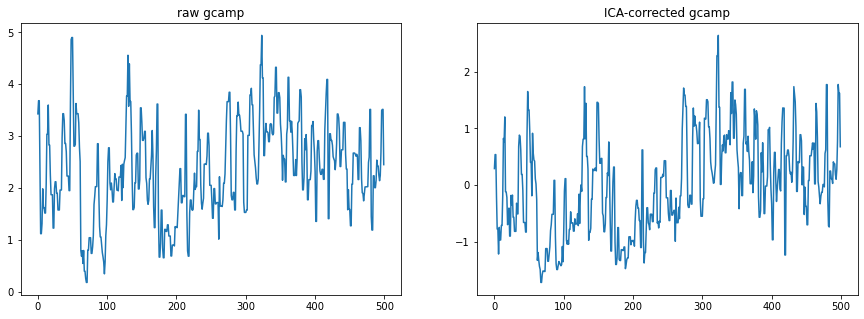

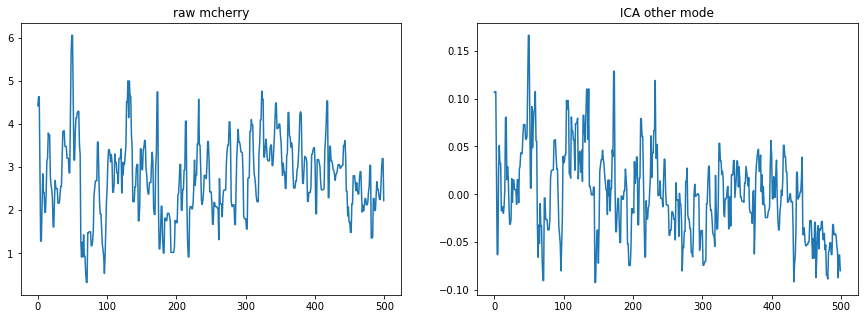

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_gcamp)
plt.title('raw gcamp')

plt.subplot(122)
plt.plot(X_transformed[:,signal_ind] * A[1,signal_ind])
plt.title('ICA-corrected gcamp')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_mcherry)
plt.title('raw mcherry')

plt.subplot(122)
plt.plot(-X_transformed[:,noise_ind])
plt.title('ICA other mode')

In [19]:
A

array([[-15.24074757, -13.48435198],
       [-18.99452832,  -7.32105407]])

## Ratiometric

Text(0.5, 1.0, 'raw mcherry')

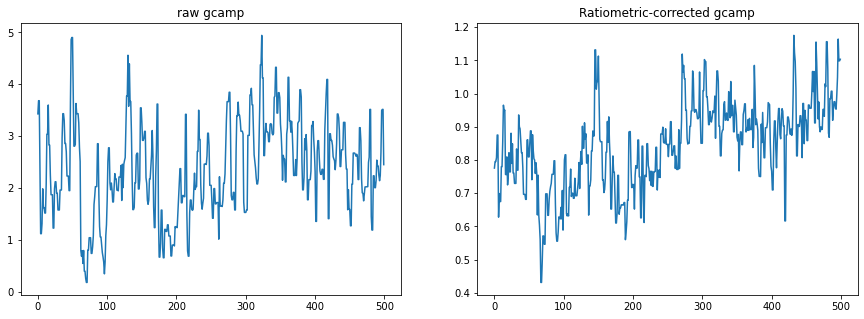

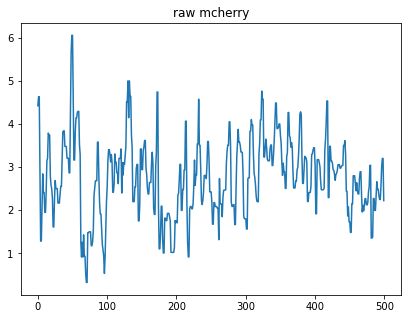

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_gcamp)
plt.title('raw gcamp')

plt.subplot(122)
plt.plot(dat_gcamp/dat_mcherry)
plt.title('Ratiometric-corrected gcamp')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_mcherry)
plt.title('raw mcherry')

# plt.subplot(122)
# plt.plot(-X_transformed[:,1])
# plt.title('ICA noise mode')

## ICA with multiple neuron-based noise

In [68]:
which_neurons = [1,2,3]

In [69]:
def my_clean(dat):
    dat = whiten(dat)
#     dat = sig.medfilt(dat, kernel_size=3)
    return dat

In [72]:
dat_mcherry = my_clean(np.vstack([all_traces[i]['mcherry'] for i in which_neurons]))
dat_gcamp = my_clean(np.vstack([all_traces[i]['gcamp'] for i in which_neurons]))

In [103]:
# Data shaping
X = np.vstack((dat_mcherry, dat_gcamp)).transpose()
transformer = FastICA(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)

# Get which one is the signal vs. noise
A = transformer.mixing_

In [104]:
A

array([[-38.68533067,  -8.07521307],
       [-38.65261969,  -4.58482189],
       [-38.39893662,  -7.89222976],
       [ -4.49144425, -26.98284903],
       [  2.69024274, -24.65131696],
       [  0.48838517, -29.11762831]])

In [97]:

signal_ind = np.argmax(np.abs(A[-1,:]))
noise_ind = 1 if signal_ind==0 else 0

Text(0.5, 1.0, 'ICA other mode')

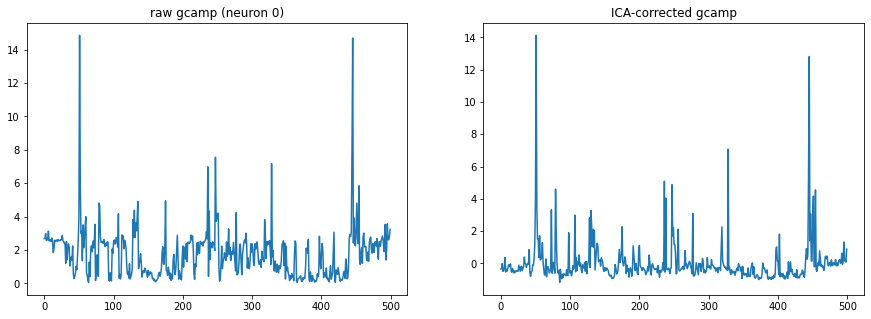

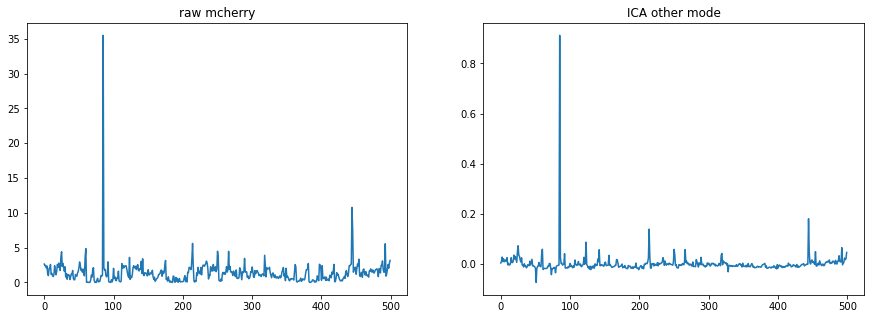

In [98]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_gcamp[0,:])
plt.title('raw gcamp (neuron 0)')

plt.subplot(122)
plt.plot(X_transformed[:,signal_ind] * A[-1,signal_ind])
plt.title('ICA-corrected gcamp')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dat_mcherry[0,:])
plt.title('raw mcherry')

plt.subplot(122)
plt.plot(-X_transformed[:,noise_ind])
plt.title('ICA other mode')

In [95]:
signal_ind

1

In [90]:
X_transformed.shape

(500, 2)

## All neuron visualization

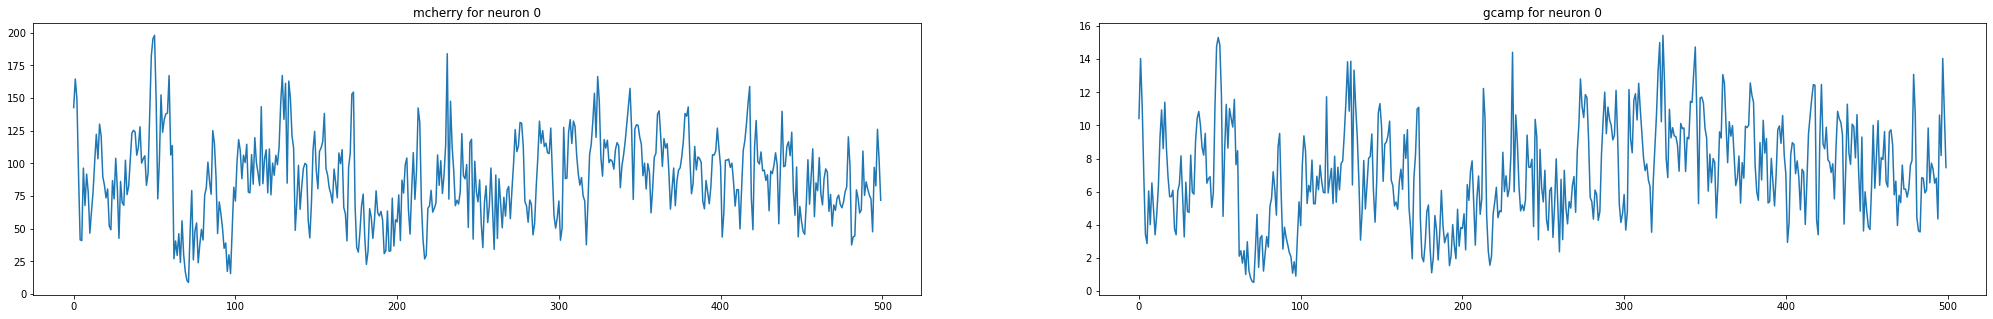

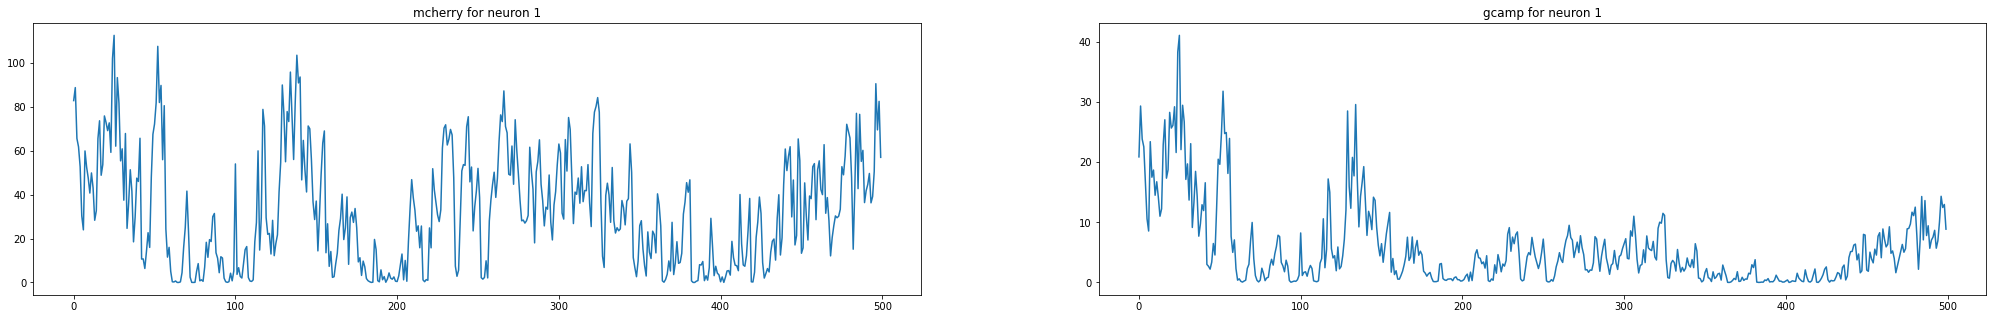

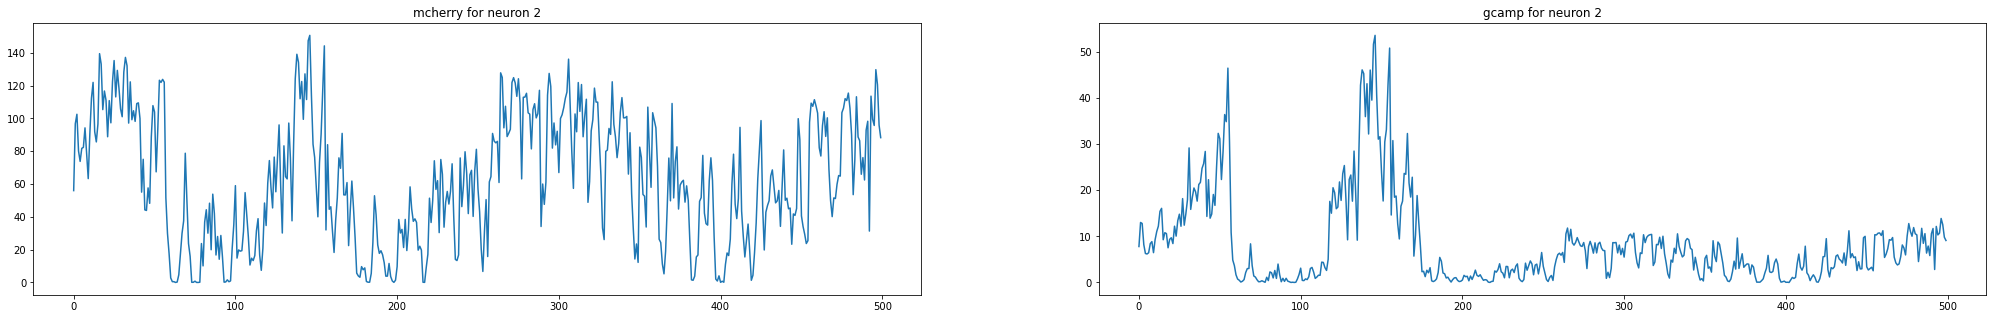

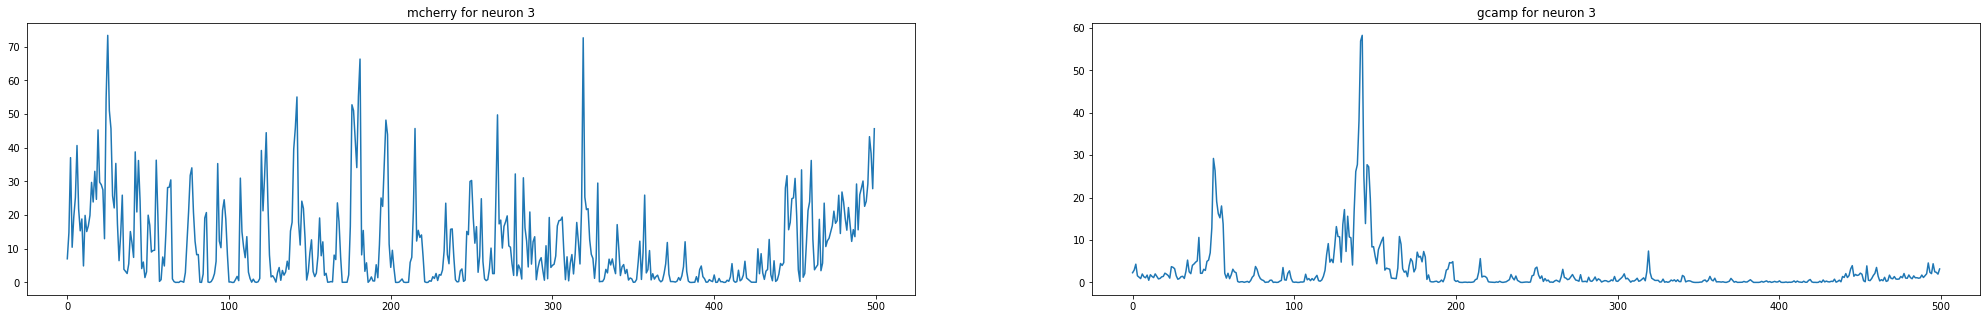

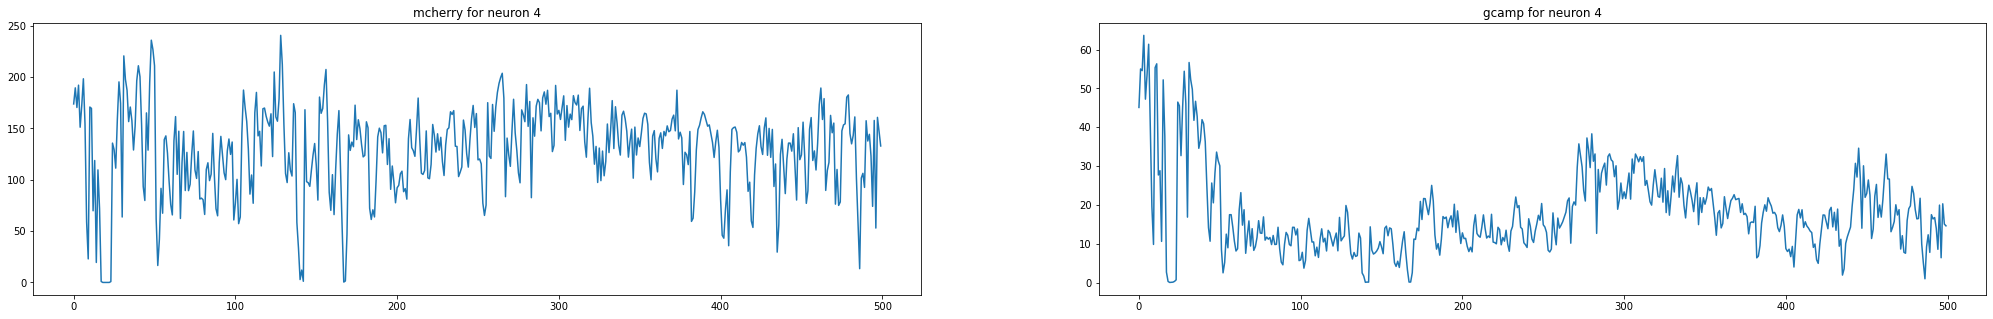

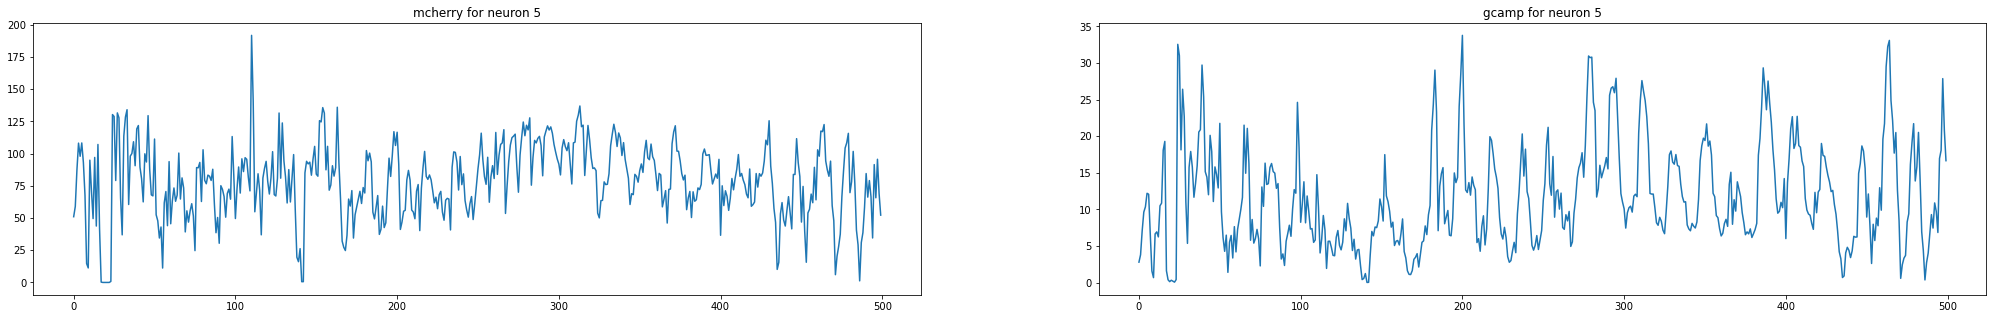

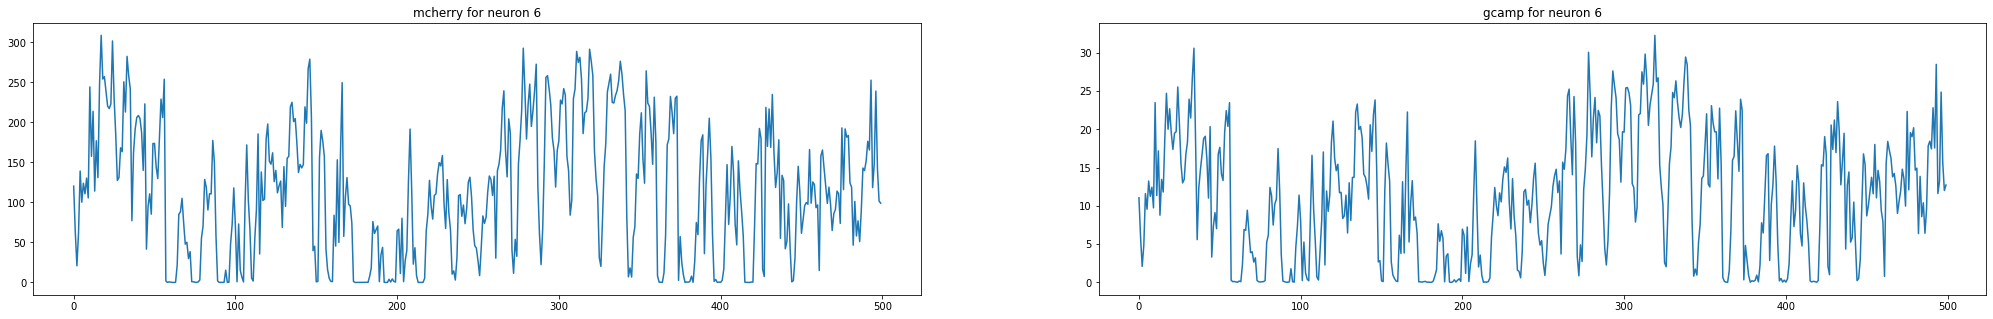

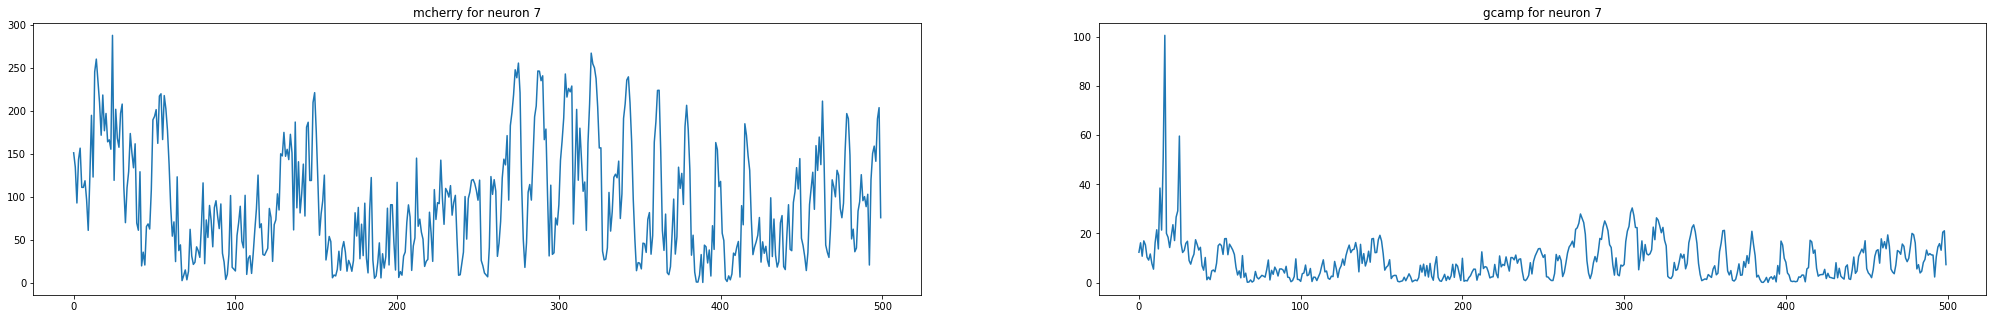

In [105]:
visualize_all_traces(all_traces)